In [2]:
import numpy as np

import sympy as sp

import scipy.linalg as la

import matplotlib.pyplot as plt

# Mínimos cuadrados


Regresión y ajuste de modelos
=============================


El análisis de regresión consiste en encontrar un  **modelo**  que relaciona los valores medidos de un conjunto de variables.


Los valores medidos en el mundo real nunca se ajustan de forma perfecta a un modelo, debido en primer lugar a errores de medida, pero también a que cualquier modelo matemático es una simplificación del mundo real, y si tuviera en cuenta todos los factores que influyen en un conjunto de variables, sería inmanejable.


Por tanto, no tiene sentido aspirar a encontrar un modelo que prediga exactamente los valores medidos, y debemos admitir que el modelo cometerá un cierto error.

Un modelo útil encuentra una relación funcional sencilla en conjuntos de pocas variables. Se trata de explicar una variable de interés en función de otro conjunto de variables mejor conocidas o más fáciles de medir. El  **análisis de regresión**  (más exactamente, el análisis de regresión  *paramétrico* ) permite encontrar un modelo explicativo en tres etapas:

 1. Nuestro conocimiento del tema en cuestión nos permite escribir un modelo que afirma que la variable  *X*  es una función de las variables $Y_1,\dots,Y_k$. La variable  *X*  recibe el nombre de  **variable dependiente**  y las variables  $Y_1,\dots,Y_k$ se llaman  **variables independientes** . La forma exacta de la función no está fijada a priori, sino que depende de unos pocos  **parámetros**  libres.

 2. Tomamos una  **muestra** . Es decir, medimos todas las variables en un subconjunto de todos los casos posibles (unos cuantos individuos de la población, unos cuantos momentos de tiempo, una cuantas muestras preparadas en el laboratorio...)

 3. **Ajustamos el modelo** , eligiendo aquellos valores de los parámetros tales que la distancia entre los valores medidos de la variable  *X*  y los valores predichos aplicando el modelo minimizan el error cometido.

### Ejemplo  de ajuste lineal


Tratamos de predecir la  *temperatura*  a la que hierve el agua ( **T** ), conocida la  *presión atmosférica*  ( **P** ) en el lugar y momento en que hacemos el experimento.


Para ello, contamos con un conjunto de mediciones de ambas variables, con la temperatura en grados Fahrenheit y la presión en pulgadas de mercurio (sea lo que sea, es una unidad de medidad de presión). Por ejemplo, en un cierto punto de los Alpes, un cierto día, el barómetro marcaba 20.79 pulgadas de mercurio, y el agua hirvió a 194.5 grados Fahrenheit. Las mediciones se realizaron en el mismo lugar geográfico, pero en días distintos, con distintas condiciones atmosféricas y quizá incluso por personas distintas. En estas condiciones, es imposible que ningún modelo prediga con exactitud el valor de T en función de P, pero esperamos que lo haga con un margen de error moderado.


    T        P
    194.5    20.79 
    194.3    20.79 
    197.9    22.4 
    198.4    22.67 
    199.4    23.15 
    199.9    23.35 
    200.9    23.89 
    201.1    23.99 
    201.4    24.02 
    201.3    24.01 
    203.6    25.14 
    204.6    26.57 
    209.5    28.49 
    208.6    27.76 
    210.7    29.04 
    211.9    29.88 
    212.2    30.06

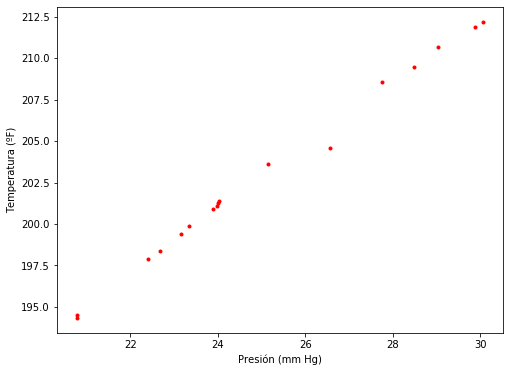

In [5]:
T_values =np.array( [194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2])
P_values =np.array( [20.79, 20.79, 22.4, 22.67, 23.15, 23.35, 23.89, 23.99, 24.02, 24.01, 25.14, 26.57, 28.49, 27.76, 29.04, 29.88, 30.06])

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(P_values, T_values,'r.')

ax.set_xlabel('Presión (mm Hg)')
ax.set_ylabel('Temperatura (ºF)')
plt.show()


Los datos parecen estar dispuestos *aproximadamente* sobre una recta, de modo que intentamos ajustar un modelo lineal, de la forma:

$$
T=a+b\cdot P
$$

Nuestras incógnitas son los valores de **a**  y  **b**. Si el modelo lineal fuera exacto, se cumplirían las $n$ ecuaciones
$$
T_i=a+b\cdot P_i,\quad i=1,\dots,n
$$
donde $n=17$ es el número de mediciones. Se trata de un sistema de 17 ecuaciones para dos incógnitas, que no tiene solución. Para unos valores fijos de  **a**  y  **b** , cometeremos un error en la medición j-ésima que será exactamente: $|T_j-(a+b\cdot P_j)|$.

Podemos escoger los valores de  **a**  y  **b**  para los que el error máximo cometido es menor, o aquellos para los que el error medio cometido es menor, o según otros muchos criterios. Es bastante habitual en estadística buscar los valores de  **a**  y  **b**  que hacen mínimo el  **error cuadrático total** :


$$
E=\sum_j (T_j-(a+b\cdot P_j))^2
$$    

Como vistéis en Álgebra Lineal de grado, o en la clase de repaso anterior, la solución de mínimos cuadrados para el sistema de ecuaciones sobredeterminado
$$
A\cdot \mathbf{x} = \mathbf{b}
$$
es la solución del sistema
$$
A^T\cdot A\cdot \mathbf{x} = A^T\cdot \mathbf{b}
$$
que sí tiene solución única si las columnas de $A$ son linealmente independientes (y en este ejemplo lo son).

### Ejercicio

Usando los comandos de álgebra lineal de los cuadernos de introducción, resuelve este sistema de ecuaciones para encontrar los coeficientes **a** y **b** de la recta de regresión ajustada por mínimos cuadrados.

Te dejamos un recordatorio de comandos de álgebra lineal...

In [16]:
A = np.array([[1,2], [1,3]])
b = np.array([[2], [1]])
print(A)
print(b)

[[1 2]
 [1 3]]
[[2]
 [1]]


In [17]:
#Producto de matrices
A@b

array([[4],
       [5]])

In [18]:
#traspuesta de A
A.T

array([[1, 1],
       [2, 3]])

In [19]:
#resolver el sistema de ecuaciones A@x = b
x = la.solve(A, b)
print(x)
print(A@x)
print(b)

[[ 4.]
 [-1.]]
[[2.]
 [1.]]
[[2]
 [1]]


Ahora intenta dibujar la nube de puntos junto con la recta de regresión.

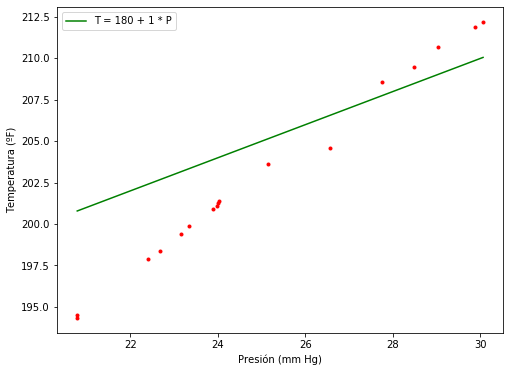

In [22]:
#### Gráfica de la recta de regresión
x_samp = P_values
y_samp = T_values

######
# Valores de la pendiente y el término independiente
# usa los valores calculados antes
m=1
c=180
######

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_samp, y_samp,'r.')

# xs es un array con 200 elementos equiespaciados 
#  entre el minimo y el maximo de x_samp
xs = np.linspace(min(x_samp), max(x_samp), 200)
ys = xs*m+c
ax.plot(xs,ys, 'g', label="T = {} + {} * P".format(c,m))

ax.set_xlabel('Presión (mm Hg)')
ax.set_ylabel('Temperatura (ºF)')
ax.legend(loc='upper left')
plt.show()

### Ejercicio 2

Repetimos ahora el ejercicio anterior para una serie de experimentos en un canal de ensayos en las que se mide la resistencia de varias embarcaciones similares a distinto número de Froude.

El objetivo es predecir la resistencia como función lineal del número de Froude:
$$
R = a + b\cdot F
$$

Resistencia y número de Froude en las pruebas

    Froude   resistence
    0.125    0.03
    0.15     0.18
    0.175    0.4
    0.2      0.73
    0.225    1.3
    0.25     2.16
    0.275    3.35
    0.3      5.06
    0.325    7.14
    0.35     10.36
    0.375    15.25
    0.4      23.15
    0.425    34.62
    0.45     51.5

In [24]:
froude = np.array([0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4,0.425,0.45])
resistence = np.array([0.03,0.18,0.4,0.73,1.3,2.16,3.35,5.06,7.14,10.36,15.25,23.15,34.62,51.5])

### Ejercicio 3

Ajusta ahora un modelo cuadrático:

$$
R = a + b\cdot F + c \cdot F^2
$$

El resultado debería ser más razonable que con el modelo lineal, pero también mejorable. Lo puedes dejar ahí, o continuar hasta un modelo de grado 4, que ya empieza a ser una aproximación decente. Por supuesto, hay aproximaciones mejores a la resistencia de una embarcación, usando datos adicionales sobre la forma del barco, el centro de gravedad, etc. Sólo queremos que practiquéis el método de mínimos cuadrados.